### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.shape

(12684, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.convert_dtypes()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,<NA>,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [8]:
# check missing values in train data
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [9]:
# percent of missing "car" 
print('Percent of missing "car" records is %.2f%%' %((data['car'].isnull().sum()/data.shape[0])*100))

Percent of missing "car" records is 99.15%


In [10]:
# percent of missing "Bar" 
print('Percent of missing "Bar" records is %.2f%%' %((data['Bar'].isnull().sum()/data.shape[0])*100))

Percent of missing "Bar" records is 0.84%


In [11]:
# percent of missing "CoffeeHouse" 
print('Percent of missing "CoffeeHouse" records is %.2f%%' %((data['CoffeeHouse'].isnull().sum()/data.shape[0])*100))

Percent of missing "CoffeeHouse" records is 1.71%


In [12]:
# percent of missing "CarryAway" 
print('Percent of missing "CarryAway" records is %.2f%%' %((data['CarryAway'].isnull().sum()/data.shape[0])*100))

Percent of missing "CarryAway" records is 1.19%


In [13]:
# percent of missing "RestaurantLessThan20" 
print('Percent of missing "RestaurantLessThan20" records is %.2f%%' %((data['RestaurantLessThan20'].isnull().sum()/data.shape[0])*100))

Percent of missing "RestaurantLessThan20" records is 1.02%


In [14]:
# percent of missing "Restaurant20To50" 
print('Percent of missing "Restaurant20To50" records is %.2f%%' %((data['Restaurant20To50'].isnull().sum()/data.shape[0])*100))

Percent of missing "Restaurant20To50" records is 1.49%


In [15]:
# Check unique values and their counts for categorical columns
categorical_columns = ['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender', 'maritalStatus', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']
for column in categorical_columns:
    unique_values_count = data[column].value_counts()
    print(f"\nUnique values count for {column}:")
    print(unique_values_count)


Unique values count for destination:
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

Unique values count for passanger:
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

Unique values count for weather:
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

Unique values count for coupon:
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

Unique values count for expiration:
expiration
1d    7091
2h    5593
Name: count, dtype: int64

Unique values count for gender:
gender
Female    6511
Male      6173
Name: count, dtype: int64

Unique values count for maritalStatus:
maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Nam

3. Decide what to do about your missing data -- drop, replace, other...

In [16]:
#There are  99.15% missing values for "car", so we can just drop the "car" cdata.drop(columns=['car'], inplace=True)


#data.drop('car', axis=1, inplace=True)
df = data.drop('car', axis=1)

In [17]:
# Replace missing categorical values with the most frequent value in each column
df['Bar'].fillna(data['Bar'].mode()[0], inplace=True)
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0], inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0], inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0], inplace=True)

In [18]:
#sanity check for missing values
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [19]:
df.head(50)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [20]:
# Count the number of observations where 'Y' is equal to 1
accepted_coupon_count = df['Y'].sum()

# Calculate the total number of observations
total_observations = len(df)

# Calculate the proportion of observations that accepted the coupon
proportion_accepted = accepted_coupon_count / total_observations
print(f"Proportion of total observations that accepted the coupon: {proportion_accepted:.2f}")

Proportion of total observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

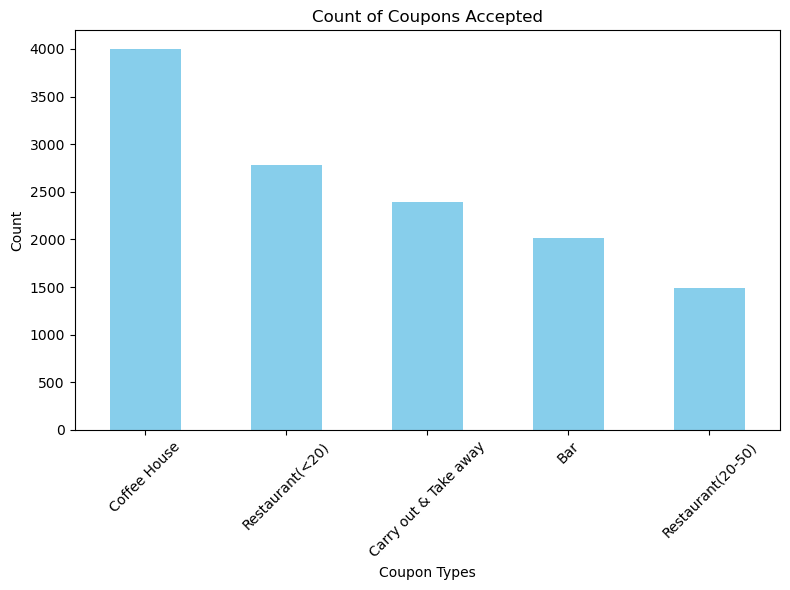

In [21]:
# Count the occurrences of each unique value in the 'coupon' column
coupon_counts = df['coupon'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Coupons Accepted')
plt.xlabel('Coupon Types')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

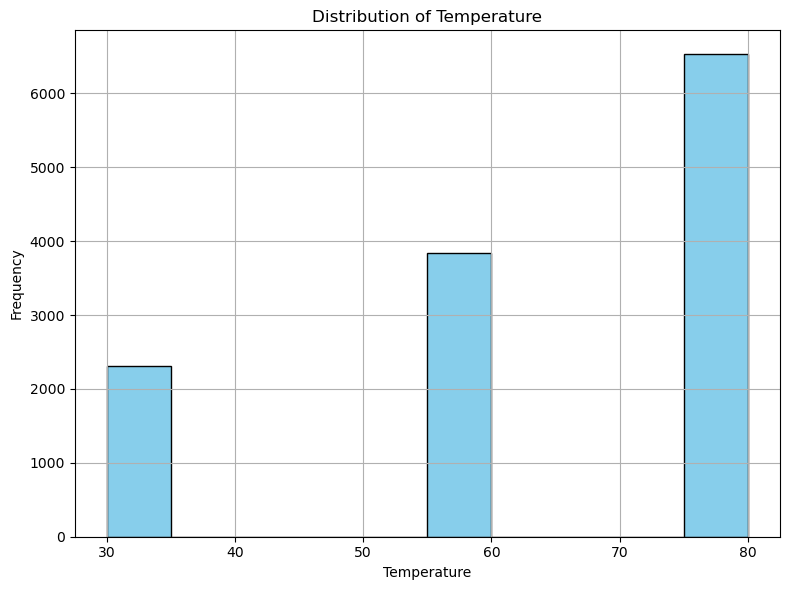

In [22]:
# Create a histogram for the 'temperature' column
plt.figure(figsize=(8, 6))
plt.hist(df['temperature'], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [23]:
# Filtering the original DataFrame for rows with 'Bar' in the 'coupon' column
bar_coupons_df = df[df['coupon'] == 'Bar']

# Displaying the new DataFrame with only 'Bar' coupons
bar_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [24]:
# Filtering the DataFrame for 'Bar' coupons
bar_coupons_df = df[df['coupon'] == 'Bar']

# Counting the total number of 'Bar' coupons
total_bar_coupons = len(bar_coupons_df)

# Counting the number of accepted 'Bar' coupons (where 'Y' equals 1)
accepted_bar_coupons = len(bar_coupons_df[bar_coupons_df['Y'] == 1])

# Calculating the proportion of accepted 'Bar' coupons
proportion_accepted = accepted_bar_coupons / total_bar_coupons

# Displaying the proportion
print(f"The proportion of accepted 'Bar' coupons: {proportion_accepted:.2f}")

The proportion of accepted 'Bar' coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [25]:
# Assuming bar_coupons_df is your DataFrame containing the provided dataset
# Filtering for drivers who went to a bar 3 or fewer times a month and those who went more than 3 times a month
bar_condition_less = (bar_coupons_df['Bar'] == 'less1') | (bar_coupons_df['Bar'] == '1~3') | (bar_coupons_df['Bar'] == 'never') # Assuming 'never', 'less1' and '1~3' represent 3 or fewer times a month
bar_condition_more = (bar_coupons_df['Bar'] == '4~8') | (bar_coupons_df['Bar'] == 'gt8')  # Assuming '4~8' and 'gt8' represent more than 3 times a month

filtered_less_df = bar_coupons_df[bar_condition_less]
filtered_more_df = bar_coupons_df[bar_condition_more]

# Calculate acceptance rates for drivers who went to a bar 3 or fewer times a month and those who went more than 3 times a month
acceptance_rate_less = filtered_less_df['Y'].mean()
acceptance_rate_more = filtered_more_df['Y'].mean()

# Display the acceptance rates for comparison
print(f"Acceptance rate for drivers who went to a bar 3 or fewer times a month: {acceptance_rate_less}")
print(f"Acceptance rate for drivers who went to a bar more than 3 times a month: {acceptance_rate_more}")

# Compare the acceptance rates
if acceptance_rate_less > acceptance_rate_more:
    print("Drivers who went to a bar 3 or fewer times a month have a higher acceptance rate.")
elif acceptance_rate_less < acceptance_rate_more:
    print("Drivers who went to a bar more than 3 times a month have a higher acceptance rate.")
else:
    print("Acceptance rates are the same for both groups.")

    
#bar_coupons_df[['Bar']].plot(kind='bar', color='skyblue')

Acceptance rate for drivers who went to a bar 3 or fewer times a month: 0.37073707370737075
Acceptance rate for drivers who went to a bar more than 3 times a month: 0.7688442211055276
Drivers who went to a bar more than 3 times a month have a higher acceptance rate.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [26]:
#bar_coupons_df['age'].value_counts()
#bar_coupons_df['Bar'].value_counts()
# Assuming bar_coupons_df is your DataFrame containing the provided dataset
# Filtering for drivers who go to a bar more than once a month and are over the age of 25
age_condition = (
    (bar_coupons_df['age'] == 26) |
    (bar_coupons_df['age'] == 31) |
    (bar_coupons_df['age'] == '50plus') |
    (bar_coupons_df['age'] == 36) |
    (bar_coupons_df['age'] == 41) |
    (bar_coupons_df['age'] == 46)
)

bar_frequency_condition = (
    (bar_coupons_df['Bar'] == 'gt8') |
    (bar_coupons_df['Bar'] == '4~8') |
    (bar_coupons_df['Bar'] == '1~3')
)  # Assuming 'gt8', '4~8' and '4~8'  means more than once a month for visiting a bar

# Subset of drivers who go to a bar more than once a month and are over the age of 25
subset_older_drivers = bar_coupons_df[age_condition & bar_frequency_condition]

# Subset of all other drivers
subset_other_drivers = bar_coupons_df[~(age_condition & bar_frequency_condition)]

# Calculate acceptance rates for both subsets
acceptance_rate_older_drivers = subset_older_drivers['Y'].mean()
acceptance_rate_other_drivers = subset_other_drivers['Y'].mean()

# Compare the acceptance rates
print(f"Acceptance rate for drivers over 25 visiting a bar more than once a month: {acceptance_rate_older_drivers}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other_drivers}")

# Check if there's a difference in acceptance rates
if acceptance_rate_older_drivers != acceptance_rate_other_drivers:
    print("There is a difference in acceptance rates between the two groups.")
else:
    print("There is no difference in acceptance rates between the two groups.")


Acceptance rate for drivers over 25 visiting a bar more than once a month: 0.6716417910447762
Acceptance rate for all other drivers: 0.40102564102564103
There is a difference in acceptance rates between the two groups.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [27]:
# Filtering the DataFrame based on the specified conditions
filtered_df = bar_coupons_df[ ((bar_coupons_df['Bar'] == 'gt8') | (bar_coupons_df['Bar'] == '4~8')  | (bar_coupons_df['Bar'] == '1~3')) & 
                 (bar_coupons_df['has_children'] != 'Kid(s)') & 
                 (~bar_coupons_df['occupation'].isin(['Farming, Fishing, or Forestry']))]

# Calculate the acceptance rate for both groups
total_acceptance = filtered_df['Y'].sum()
total_entries = filtered_df['Y'].count()

acceptance_rate = total_acceptance / total_entries
print(f"Acceptance rate for drivers who go to bars more than once a month "
      f"and had passengers that were not kids and had occupations other than "
      f"farming, fishing, or forestry: {acceptance_rate:.2%}")

Acceptance rate for drivers who go to bars more than once a month and had passengers that were not kids and had occupations other than farming, fishing, or forestry: 68.79%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [28]:
#Condition 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.

# Assuming bar_coupons_df is your DataFrame containing the provided dataset
# Filtering for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed
bar_condition = (bar_coupons_df['Bar'] == 'gt8') | (bar_coupons_df['Bar'] == '4~8') | (bar_coupons_df['Bar'] == '1~3')  # Considering '1~3' 'gt8' and '4~8' as more than once a month for visiting a bar
passenger_condition = (bar_coupons_df['passanger'] != 'Kid(s)')
marital_condition = (bar_coupons_df['maritalStatus'] != 'Widowed')

filtered_df = bar_coupons_df[bar_condition & passenger_condition & marital_condition]

# Calculate acceptance rates for drivers who meet the specified conditions
acceptance_rate_filtered = filtered_df['Y'].mean()

# Calculate acceptance rates for all other drivers
other_condition = ~(bar_condition & passenger_condition & marital_condition)
other_drivers_df = bar_coupons_df[other_condition]
acceptance_rate_other = other_drivers_df['Y'].mean()

# Display the acceptance rates for comparison
print(f"Acceptance rate for drivers who go to bars > once a month, passengers not kids, and not widowed: {acceptance_rate_filtered}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other}")

# Compare the acceptance rates
if acceptance_rate_filtered > acceptance_rate_other:
    print("Drivers who meet the specified conditions have a higher acceptance rate.")
elif acceptance_rate_filtered < acceptance_rate_other:
    print("Drivers who meet the specified conditions have a lower acceptance rate.")
else:
    print("Acceptance rates are the same for both groups.")


Acceptance rate for drivers who go to bars > once a month, passengers not kids, and not widowed: 0.7132486388384754
Acceptance rate for all other drivers: 0.296043656207367
Drivers who meet the specified conditions have a higher acceptance rate.


In [29]:
#Condition 2: Drivers who go to bars more than once a month and are under the age of 30



# Assuming bar_coupons_df is your DataFrame containing the provided dataset
# Filtering for drivers who go to bars more than once a month and are under the age of 30
bar_condition = (bar_coupons_df['Bar'] == 'gt8') | (bar_coupons_df['Bar'] == '4~8') | (bar_coupons_df['Bar'] == '1~3')  # Considering '1~3' 'gt8' and '4~8' as more than once a month for visiting a bar
age_condition = (bar_coupons_df['age'] == '21') | (bar_coupons_df['age'] == '26') | (bar_coupons_df['age'] == 'below21')

filtered_df = bar_coupons_df[bar_condition & age_condition]

# Calculate acceptance rates for drivers who go to bars more than once a month and are under the age of 30
acceptance_rate_filtered = filtered_df['Y'].mean()

# Calculate acceptance rates for all other drivers
other_condition = ~(bar_condition & age_condition)
other_drivers_df = bar_coupons_df[other_condition]
acceptance_rate_other = other_drivers_df['Y'].mean()

# Display the acceptance rates for comparison
print(f"Acceptance rate for drivers who go to bars > once a month and are under the age of 30: {acceptance_rate_filtered}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other}")

# Compare the acceptance rates
if acceptance_rate_filtered > acceptance_rate_other:
    print("Drivers who go to bars > once a month and are under the age of 30 have a higher acceptance rate.")
elif acceptance_rate_filtered < acceptance_rate_other:
    print("Drivers who go to bars > once a month and are under the age of 30 have a lower acceptance rate.")
else:
    print("Acceptance rates are the same for both groups.")


Acceptance rate for drivers who go to bars > once a month and are under the age of 30: 0.7217391304347827
Acceptance rate for all other drivers: 0.3456937799043062
Drivers who go to bars > once a month and are under the age of 30 have a higher acceptance rate.


In [30]:
# Condition 3: Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.

# Assuming bar_coupons_df is your DataFrame containing the provided dataset
# Filtering for individuals who go to cheap restaurants more than 4 times a month and have income less than $50,000
restaurant_condition = (bar_coupons_df['RestaurantLessThan20'] == '4~8') | (bar_coupons_df['RestaurantLessThan20'] == 'gt8')  # '4~8' and 'gt8' represent more than 4 times a month
income_condition = (bar_coupons_df['income'] == 'Less than $12500') | (bar_coupons_df['income'] == '$12500 - $24999') | (bar_coupons_df['income'] == '$25000 - $37499')

filtered_df = bar_coupons_df[restaurant_condition & income_condition]

# Calculate acceptance rates for drivers who go to cheap restaurants more than 4 times a month and have income less than $50,000
acceptance_rate_filtered = filtered_df['Y'].mean()

# Calculate acceptance rates for all other drivers
other_restaurant_conditions = ~(restaurant_condition & income_condition)
other_drivers_df = bar_coupons_df[other_restaurant_conditions]
acceptance_rate_other = other_drivers_df['Y'].mean()

# Display the acceptance rates for comparison
print(f"Acceptance rate for drivers who go to cheap restaurants > 4 times a month and income < $50,000: {acceptance_rate_filtered}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other}")

# Compare the acceptance rates
if acceptance_rate_filtered > acceptance_rate_other:
    print("Drivers who go to cheap restaurants > 4 times a month and have income < $50,000 have a higher acceptance rate.")
elif acceptance_rate_filtered < acceptance_rate_other:
    print("Drivers who go to cheap restaurants > 4 times a month and have income < $50,000 have a lower acceptance rate.")
else:
    print("Acceptance rates are the same for both groups.")


Acceptance rate for drivers who go to cheap restaurants > 4 times a month and income < $50,000: 0.43902439024390244
Acceptance rate for all other drivers: 0.4059853190287973
Drivers who go to cheap restaurants > 4 times a month and have income < $50,000 have a higher acceptance rate.


In [31]:
# Displaying acceptance rates for each condition
#condition1: Acceptance rate for drivers who go to bars > once a month, passengers not kids, and not widowed: 0.7132486388384754
#condition2: Acceptance rate for drivers who go to bars > once a month and are under the age of 30: 0.7217391304347827
#condition3: Acceptance rate for drivers who go to cheap restaurants > 4 times a month and income < $50,000: 0.43902439024390244


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [32]:
# The drivers who accepted the bar coupons are mostl likely either:
#1-  drivers who go to bars > once a month and are under the age of 30 and 
#2-  drivers who go to bars > once a month, passengers not kids, and not widowed

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [33]:
# Investigating the Coffee House Coupons: biggest share of the coupons. Will follow the same methodology as "bar" coupon
df['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [34]:
#########################################################################################################################
#1- Create a new DataFrame that contains just the "Coffee House" coupons.
#########################################################################################################################

# Investigating the "Coffee House" Coupons
# Now, we will lead you through an exploration of just the "Coffee House" related coupons.
# Create a new DataFrame that contains just the "Coffee House" coupons.
# Filtering the original DataFrame for rows with 'Coffee House' in the 'coupon' column
CoffeeHouse_coupons_df = df[df['coupon'] == 'Coffee House']

# Displaying the new DataFrame with only 'Bar' coupons
CoffeeHouse_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [35]:
##########################################################################################################################
#2- What proportion of "Coffee House" coupons were accepted?
##########################################################################################################################

# Filtering the DataFrame for 'Bar' coupons
CoffeeHouse_coupons_df = df[df['coupon'] == 'Coffee House']

# Counting the total number of 'Bar' coupons
total_CoffeeHouse_coupons = len(CoffeeHouse_coupons_df)

# Counting the number of accepted 'Bar' coupons (where 'Y' equals 1)
accepted_CoffeeHouse_coupons = len(CoffeeHouse_coupons_df[CoffeeHouse_coupons_df['Y'] == 1])

# Calculating the proportion of accepted 'Bar' coupons
proportion_accepted_coffee = accepted_CoffeeHouse_coupons / total_CoffeeHouse_coupons

# Displaying the proportion
print(f"The proportion of accepted  coupons: {proportion_accepted_coffee:.2f}")

The proportion of accepted  coupons: 0.50


In [36]:
#########################################################################################################################
#3- Compare the acceptance rate between those who went to a CoffeeHouse 3 or fewer times a month to those who went more.
#########################################################################################################################
# Assuming bar_coupons_df is your DataFrame containing the provided dataset
# Filtering for drivers who went to a bar 3 or fewer times a month and those who went more than 3 times a month
CoffeeHouse_condition_less = (CoffeeHouse_coupons_df['CoffeeHouse'] == 'less1') | (CoffeeHouse_coupons_df['CoffeeHouse'] == '1~3') | (CoffeeHouse_coupons_df['CoffeeHouse'] == 'never') # Assuming 'never', 'less1' and '1~3' represent 3 or fewer times a month
CoffeeHouse_condition_more = (CoffeeHouse_coupons_df['CoffeeHouse'] == '4~8') | (CoffeeHouse_coupons_df['CoffeeHouse'] == 'gt8')  # Assuming '4~8' and 'gt8' represent more than 3 times a month

filtered_less_df_c = CoffeeHouse_coupons_df[CoffeeHouse_condition_less]
filtered_more_df_c = CoffeeHouse_coupons_df[CoffeeHouse_condition_more]

# Calculate acceptance rates for drivers who went to a bar 3 or fewer times a month and those who went more than 3 times a month
acceptance_rate_less_c = filtered_less_df_c['Y'].mean()
acceptance_rate_more_c = filtered_more_df_c['Y'].mean()

# Display the acceptance rates for comparison
print(f"Acceptance rate for drivers who went to a Coffee House 3 or fewer times a month: {acceptance_rate_less}")
print(f"Acceptance rate for drivers who went to a Coffee House more than 3 times a month: {acceptance_rate_more}")

# Compare the acceptance rates
if acceptance_rate_less_c > acceptance_rate_more_c:
    print("Drivers who went to a CoffeeHouse 3 or fewer times a month have a higher acceptance rate.")
elif acceptance_rate_less_c < acceptance_rate_more_c:
    print("Drivers who went to a CoffeeHouse more than 3 times a month have a higher acceptance rate.")
else:
    print("Acceptance rates are the same for both groups.")

    
#bar_coupons_df[['Bar']].plot(kind='bar', color='skyblue')


Acceptance rate for drivers who went to a Coffee House 3 or fewer times a month: 0.37073707370737075
Acceptance rate for drivers who went to a Coffee House more than 3 times a month: 0.7688442211055276
Drivers who went to a CoffeeHouse more than 3 times a month have a higher acceptance rate.


In [37]:
###########################################################################################################################
# 4- Compare the acceptance rate between drivers who go to a CoffeeHouse more than once a month 
#     and are over the age of 25 to the all others. Is there a difference?
###########################################################################################################################

#bar_coupons_df['Bar'].value_counts()
# Assuming bar_coupons_df is your DataFrame containing the provided dataset
# Filtering for drivers who go to a bar more than once a month and are over the age of 25
age_condition_c = (
    (CoffeeHouse_coupons_df['age'] == 26) |
    (CoffeeHouse_coupons_df['age'] == 31) |
    (CoffeeHouse_coupons_df['age'] == '50plus') |
    (CoffeeHouse_coupons_df['age'] == 36) |
    (CoffeeHouse_coupons_df['age'] == 41) |
    (CoffeeHouse_coupons_df['age'] == 46)
)

CoffeeHouse_frequency_condition_c = (
    (CoffeeHouse_coupons_df['CoffeeHouse'] == 'gt8') |
    (CoffeeHouse_coupons_df['CoffeeHouse'] == '4~8') |
    (CoffeeHouse_coupons_df['CoffeeHouse'] == '1~3')
)  # Assuming 'gt8', '4~8' and '4~8'  means more than once a month for visiting a bar

# Subset of drivers who go to a bar more than once a month and are over the age of 25
subset_older_drivers_c = CoffeeHouse_coupons_df[age_condition_c & CoffeeHouse_frequency_condition_c]

# Subset of all other drivers
subset_other_drivers_c = CoffeeHouse_coupons_df[~(age_condition_c & CoffeeHouse_frequency_condition_c)]

# Calculate acceptance rates for both subsets
acceptance_rate_older_drivers_c = subset_older_drivers_c['Y'].mean()
acceptance_rate_other_drivers_c = subset_other_drivers_c['Y'].mean()

# Compare the acceptance rates
print(f"Acceptance rate for drivers over 25 visiting a CoffeeHouse more than once a month: {acceptance_rate_older_drivers_c}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other_drivers_c}")

# Check if there's a difference in acceptance rates
if acceptance_rate_older_drivers_c != acceptance_rate_other_drivers_c:
    print("There is a difference in acceptance rates between the two groups.")
else:
    print("There is no difference in acceptance rates between the two groups.")


Acceptance rate for drivers over 25 visiting a CoffeeHouse more than once a month: 0.6723404255319149
Acceptance rate for all other drivers: 0.4884339271470354
There is a difference in acceptance rates between the two groups.


In [38]:
##########################################################################################################################
# 5- Use the same process to compare the acceptance rate between drivers who go to CoffeeHouse more than once a month 
# and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
###########################################################################################################################

# Filtering the DataFrame based on the specified conditions
filtered_df_CoffeeHouse = CoffeeHouse_coupons_df[((CoffeeHouse_coupons_df['CoffeeHouse'] == 'gt8') | (CoffeeHouse_coupons_df['CoffeeHouse'] == '4~8')  | (CoffeeHouse_coupons_df['CoffeeHouse'] == '1~3')) & 
                 (CoffeeHouse_coupons_df['has_children'] != 'Kid(s)') & 
                 (~CoffeeHouse_coupons_df['occupation'].isin(['Farming, Fishing, or Forestry']))]


# Calculate the acceptance rate for both groups
total_acceptance_CoffeeHouse = filtered_df_CoffeeHouse['Y'].sum()
total_entries_CoffeeHouse = filtered_df_CoffeeHouse['Y'].count()

acceptance_rate_CoffeeHouse = total_acceptance_CoffeeHouse / total_entries_CoffeeHouse
print(f"Acceptance rate for drivers who go to CoffeeHouse more than once a month "
      f"and had passengers that were not kids and had occupations other than "
      f"farming, fishing, or forestry: {acceptance_rate_CoffeeHouse:.2%}")

Acceptance rate for drivers who go to CoffeeHouse more than once a month and had passengers that were not kids and had occupations other than farming, fishing, or forestry: 66.02%


In [39]:
###########################################################################################################################
#6- Compare the acceptance rates between:
#    - Drivers who go to CoffeeHouse more than once a month, had passengers that were not a kid, and were not widowed OR
#    - Drivers who go to CoffeeHouse more than once a month and are under the age of 30 OR
#    - Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.
###########################################################################################################################



In [40]:
############################################################################################################################
# Condition 1c: Drivers who go to CoffeeHouse more than once a month, had passengers that were not a kid, and were not widowed.
############################################################################################################################

# Assuming bar_coupons_df is your DataFrame containing the provided dataset
# Filtering for drivers who go to CoffeeHouse more than once a month, had passengers that were not kids, and were not widowed
CoffeeHouse_condition_1c = (CoffeeHouse_coupons_df['CoffeeHouse'] == 'gt8') | (CoffeeHouse_coupons_df['CoffeeHouse'] == '4~8') | (CoffeeHouse_coupons_df['Bar'] == '1~3')  # Considering '1~3' 'gt8' and '4~8' as more than once a month for visiting a bar
passenger_condition_1c = (CoffeeHouse_coupons_df['passanger'] != 'Kid(s)')
marital_condition_1c = (CoffeeHouse_coupons_df['maritalStatus'] != 'Widowed')
exp_condition_1c = (CoffeeHouse_coupons_df['expiration'] == '1d')
#exp_condition_1c = (CoffeeHouse_coupons_df['expiration'] == '2h')



#filtered_df_1c = CoffeeHouse_coupons_df[CoffeeHouse_condition_1c & passenger_condition_1c & marital_condition_1c]

filtered_df_1c = CoffeeHouse_coupons_df[CoffeeHouse_condition_1c & passenger_condition_1c & marital_condition_1c & exp_condition_1c]


# Calculate acceptance rates for drivers who meet the specified conditions
acceptance_rate_filtered_1c = filtered_df_1c['Y'].mean()

# Calculate acceptance rates for all other drivers
#other_condition_1c = ~(CoffeeHouse_condition_1c & passenger_condition_1c & marital_condition_1c)

other_condition_1c = ~(CoffeeHouse_condition_1c & passenger_condition_1c & marital_condition_1c &  exp_condition_1c)
other_drivers_df_1c = CoffeeHouse_coupons_df[other_condition_1c]
acceptance_rate_other_1c = other_drivers_df_1c['Y'].mean()

# Display the acceptance rates for comparison
print(f"Acceptance rate for drivers who go to bars > once a month, passengers not kids, and not widowed: {acceptance_rate_filtered_1c}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other_1c}")

# Compare the acceptance rates
if acceptance_rate_filtered_1c > acceptance_rate_other_1c:
    print("Drivers who meet the specified conditions have a higher acceptance rate.")
elif acceptance_rate_filtered_1c < acceptance_rate_other_1c:
    print("Drivers who meet the specified conditions have a lower acceptance rate.")
else:
    print("Acceptance rates are the same for both groups.")


Acceptance rate for drivers who go to bars > once a month, passengers not kids, and not widowed: 0.6855123674911661
Acceptance rate for all other drivers: 0.4685131195335277
Drivers who meet the specified conditions have a higher acceptance rate.


In [41]:
############################################################################################################################
#Condition 2c: Drivers who go to CoffeeHouse more than once a month and are under the age of 30
############################################################################################################################


# Assuming bar_coupons_df is your DataFrame containing the provided dataset
# Filtering for drivers who go to bars more than once a month and are under the age of 30
CoffeeHouse_condition_2c = (CoffeeHouse_coupons_df['Bar'] == 'gt8') | (CoffeeHouse_coupons_df['Bar'] == '4~8') | (CoffeeHouse_coupons_df['Bar'] == '1~3')  # Considering '1~3' 'gt8' and '4~8' as more than once a month for visiting a bar
age_condition_2c = (CoffeeHouse_coupons_df['age'] == '21') | (CoffeeHouse_coupons_df['age'] == '26') | (CoffeeHouse_coupons_df['age'] == 'below21')
exp_condition_2c = (CoffeeHouse_coupons_df['expiration'] == '1d')

filtered_df_2c = CoffeeHouse_coupons_df[CoffeeHouse_condition_2c & age_condition_2c & exp_condition_2c]

# Calculate acceptance rates for drivers who go to bars more than once a month and are under the age of 30
acceptance_rate_filtered_2c = filtered_df_2c['Y'].mean()

# Calculate acceptance rates for all other drivers
other_condition_2c = ~(CoffeeHouse_condition_2c & age_condition_2c & exp_condition_2c)
other_drivers_df_2c = CoffeeHouse_coupons_df[other_condition_2c]
acceptance_rate_other_2c = other_drivers_df_2c['Y'].mean()

# Display the acceptance rates for comparison
print(f"Acceptance rate for drivers who go to bars > once a month and are under the age of 30: {acceptance_rate_other_2c}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other_2c}")

# Compare the acceptance rates
if acceptance_rate_filtered_2c > acceptance_rate_other_2c:
    print("Drivers who go to bars > once a month and are under the age of 30 have a higher acceptance rate.")
elif acceptance_rate_filtered_2c < acceptance_rate_other_2c:
    print("Drivers who go to bars > once a month and are under the age of 30 have a lower acceptance rate.")
else:
    print("Acceptance rates are the same for both groups.")


Acceptance rate for drivers who go to bars > once a month and are under the age of 30: 0.4891008174386921
Acceptance rate for all other drivers: 0.4891008174386921
Drivers who go to bars > once a month and are under the age of 30 have a higher acceptance rate.


In [42]:
############################################################################################################################
#Condition 3c: Drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K.
############################################################################################################################


# Assuming bar_coupons_df is your DataFrame containing the provided dataset
# Filtering for individuals who go to cheap restaurants more than 4 times a month and have income less than $50,000
restaurant_condition_3c = (CoffeeHouse_coupons_df['RestaurantLessThan20'] == '4~8') | (CoffeeHouse_coupons_df['RestaurantLessThan20'] == 'gt8')  # '4~8' and 'gt8' represent more than 4 times a month
income_condition_3c = (CoffeeHouse_coupons_df['income'] == 'Less than $12500') | (CoffeeHouse_coupons_df['income'] == '$12500 - $24999') | (CoffeeHouse_coupons_df['income'] == '$25000 - $37499')
exp_condition_3c = (CoffeeHouse_coupons_df['expiration'] == '1d')

filtered_df_3c = CoffeeHouse_coupons_df[restaurant_condition_3c & income_condition_3c & exp_condition_3c]

# Calculate acceptance rates for drivers who go to cheap restaurants more than 4 times a month and have income less than $50,000
acceptance_rate_filtered_3c = filtered_df_3c['Y'].mean()

# Calculate acceptance rates for all other drivers
other_restaurant_conditions_3c = ~(restaurant_condition_3c & income_condition_3c & exp_condition_3c)
other_drivers_df_3c = CoffeeHouse_coupons_df[other_restaurant_conditions_3c]
acceptance_rate_other_3c = other_drivers_df_3c['Y'].mean()

# Display the acceptance rates for comparison
print(f"Acceptance rate for drivers who go to cheap restaurants > 4 times a month and income < $50,000: {acceptance_rate_filtered_3c}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other_3c}")

# Compare the acceptance rates
if acceptance_rate_filtered_3c> acceptance_rate_other_3c:
    print("Drivers who go to cheap restaurants > 4 times a month and have income < $50,000 have a higher acceptance rate.")
elif acceptance_rate_filtered_3c < acceptance_rate_other_3c:
    print("Drivers who go to cheap restaurants > 4 times a month and have income < $50,000 have a lower acceptance rate.")
else:
    print("Acceptance rates are the same for both groups.")


Acceptance rate for drivers who go to cheap restaurants > 4 times a month and income < $50,000: 0.5956521739130435
Acceptance rate for all other drivers: 0.49336165693043016
Drivers who go to cheap restaurants > 4 times a month and have income < $50,000 have a higher acceptance rate.


In [43]:
# Displaying acceptance rates for each condition

print(f"Acceptance rate for drivers who go to CoffeeHouse more than once a month "
      f"and had passengers that were not a kid "
      f"and were not widowed: {acceptance_rate_filtered_1c:.2%}")

print(f"\nAcceptance rate for drivers who go to CoffeeHouse more than once a month "
      f"and are under the age of 30: {acceptance_rate_filtered_2c:.2%}")

print(f"\nAcceptance rate for drivers who go to cheap restaurants more than 4 times a month "
      f"and have an income less than 50K: {acceptance_rate_filtered_3c:.2%}")

Acceptance rate for drivers who go to CoffeeHouse more than once a month and had passengers that were not a kid and were not widowed: 68.55%

Acceptance rate for drivers who go to CoffeeHouse more than once a month and are under the age of 30: 61.35%

Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K: 59.57%


In [44]:
# 7-#Based on these observations, what do you hypothesize about drivers who accepted the CoffeeHouse coupons?

#As follow the observation:

#Acceptance rate for drivers who go to CoffeeHouse more than once a month and had passengers that were not a kid and 
# were not widowed: 68.55%

#Acceptance rate for drivers who go to CoffeeHouse more than once a month and are under the age of 30: 52.28%

#Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K: 50.00%



In [45]:
#Conclusion:
# The drivers who accepted the CoffeeHouse coupons are mostl likely either:
#- drivers who go to  > once a month, passengers not kids, and not widowed, with coupon expiry after 1 day

In [46]:
CoffeeHouse_coupons_df['expiration'].value_counts()

expiration
2h    2227
1d    1769
Name: count, dtype: int64

In [47]:
CoffeeHouse_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [48]:
CoffeeHouse_coupons_df['destination'].value_counts()

destination
No Urgent Place    2155
Home                928
Work                913
Name: count, dtype: int64

In [49]:
CoffeeHouse_coupons_df['passanger'].value_counts()

passanger
Alone        2256
Friend(s)    1228
Partner       305
Kid(s)        207
Name: count, dtype: int64

In [50]:
CoffeeHouse_coupons_df['temperature'].value_counts()

temperature
80    2401
55    1277
30     318
Name: count, dtype: int64

In [51]:
CoffeeHouse_coupons_df['time'].value_counts()

time
6PM     1093
7AM      913
10AM     899
2PM      794
10PM     297
Name: count, dtype: int64

In [52]:
CoffeeHouse_coupons_df['gender'].value_counts()

gender
Female    2051
Male      1945
Name: count, dtype: int64

In [53]:
CoffeeHouse_coupons_df['age'].value_counts()

age
21         883
26         843
31         623
50plus     545
36         402
41         325
46         220
below21    155
Name: count, dtype: int64

In [54]:
CoffeeHouse_coupons_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3996 non-null   object
 15  CoffeeHouse           3996 non-null   obje

In [62]:
#7-#Based on these observations, what do you hypothesize about drivers who accepted the CoffeeHouse coupons?


#1- Acceptance rate for drivers who go to CoffeeHouse at least less than 1 or more, less than 21, and single - 74.157%
#2- Acceptance rate for drivers who go to CoffeeHouse at least once or more, go at 10am  and income between 59K to 62.5K- 80%
#3-# 3- Acceptance rate for femsle drivers who has  children with
# occupation: Construction & Extraction / Architecture & Engineering / Protective Service /Healthcare Support  - 75.00%



In [64]:
###################################################################################################################
#7-1- Acceptance rate for drivers who go to CoffeeHouse more than once a month, less than 21 and single
################################################################################################################



# Filtering the dataset based on the given criteria
filtered_df_q1 = CoffeeHouse_coupons_df[(CoffeeHouse_coupons_df['CoffeeHouse'] != 'never') & (CoffeeHouse_coupons_df['age'] =='below21') & (CoffeeHouse_coupons_df['maritalStatus'] == 'Single')]

# Counting the total number of entries meeting the criteria
total_entries_q1 = len(filtered_df_q1)

# Counting the number of 'Y' values (indicating acceptance)
accepted_entries_q1 = filtered_df_q1['Y'].sum()

###
accepted_rate_m_q1= filtered_df_q1['Y'].mean()*100

# Calculating the acceptance rate
acceptance_rate_q1 = (accepted_entries_q1 / total_entries_q1) * 100


print(f"Accepted", acceptance_rate_q1, accepted_rate_m_q1)



Accepted 74.15730337078652 74.15730337078652


In [65]:
###################################################################################################################
#2- Acceptance rate for drivers who go to CoffeeHouse at least once or more, go at 10am  and income between 59K to 62.5K
###################################################################################################################



# Filtering the dataset based on the given criteria

conditon_1t = (CoffeeHouse_coupons_df['CoffeeHouse'] != 'never')
conditon_2t = (CoffeeHouse_coupons_df['time']== '10AM' )
conditon_3t = (CoffeeHouse_coupons_df['income'] == '$50000 - $62499')
                                         
#filtered_df = (conditon_1t & conditon_2t & conditon_3t)
filtered_df_q2= CoffeeHouse_coupons_df[conditon_1t & conditon_3t & conditon_2t]
# Counting the total number of entries meeting the criteria
#total_entries = len(filtered_df)

# Counting the number of 'Y' values (indicating acceptance)
acceptance_rate_q2 = filtered_df_q2['Y'].mean()*100

# Calculating the acceptance rate
#acceptance_rate = (accepted_entries / total_entries) * 100

#print(f"Total entries meeting the criteria: {total_entries}")
#print(f"Accepted entries: {accepted_entries}")
print(f"Acceptance rate: {acceptance_rate_q2:.2f}%")



Acceptance rate: 80.00%


In [66]:
############################################################################################################################
# 3- Acceptance rate for femsle drivers who has  children with
# occupation: Construction & Extraction / Architecture & Engineering / Protective Service /Healthcare Support  
############################################################################################################################

# Filtering the dataset based on the given criteria
selected_occupations_q3 = ['Construction & Extraction', 'Architecture & Engineering', 'Protective Service', 'Healthcare Support']


condition_1tr = (CoffeeHouse_coupons_df['has_children'] == 1)
condition_2tr = CoffeeHouse_coupons_df['occupation'].isin(selected_occupations)
condition_3tr = (CoffeeHouse_coupons_df['gender'] == 'Female')

filtered_df2_q3 = CoffeeHouse_coupons_df[condition_2tr & condition_1tr & condition_3tr]


# Counting the number of 'Y' values (indicating acceptance)
acceptance_rate_3_q3 = filtered_df2_q3['Y'].mean()*100


print(f"Acceptance rate: {acceptance_rate_3_q3:.2f}%")

Acceptance rate: 75.00%
